Summary of magicblast


In [2]:
import numpy as np
import math
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import pathlib
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
PROJECT_CODE='PRJNA573298'
BASE_PATH = f'/mnt/1TB_0/Data/Assembly/{PROJECT_CODE}/'

In [5]:
SRAs=['SRR10168373','SRR10168374',\
      'SRR10168375','SRR10168376',\
      'SRR10168377','SRR10168378',\
      'SRR10168379','SRR10168380',\
      'SRR10168381','SRR10168382',\
      'SRR10168383','SRR10168384',\
      'SRR10168385','SRR10168386',\
      'SRR10168387','SRR10168388',\
      'SRR10168389','SRR10168390',\
     'SRR10168391','SRR10168392','SRR10168393']

### Combine dfs

In [165]:
dfS20mp=pd.read_csv(BASE_PATH+'/general_plots/'+f'MEGAHIT_final_hu_mus_manjav_manpten_default_bowtie2_ConcatRef_split_manpten_flagstats_basic_stats.csv')
dfS20mp.drop(columns=['Unnamed: 0'],inplace=True)
dfS20mp.set_index('SRA', inplace = True)
dfS20mp.reset_index(inplace=True)
dfS20mp = dfS20mp.rename(columns = {'index':'SRA'})
dfS20mp.rename(columns = {'mapped':'mp_mapped'}, inplace = True)

In [166]:
dfS20hu=pd.read_csv(BASE_PATH+'/general_plots/'+f'MEGAHIT_final_hu_mus_manjav_manpten_default_bowtie2_ConcatRef_split_human_flagstats_basic_stats.csv')
dfS20hu.drop(columns=['Unnamed: 0'],inplace=True)
dfS20hu.set_index('SRA', inplace = True)
dfS20hu.reset_index(inplace=True)
dfS20hu = dfS20hu.rename(columns = {'index':'SRA'})
dfS20hu.rename(columns = {'mapped':'hu_mapped'}, inplace = True)

In [167]:
dfS20mu=pd.read_csv(BASE_PATH+'/general_plots/'+f'MEGAHIT_final_hu_mus_manjav_manpten_default_bowtie2_ConcatRef_split_mouse_flagstats_basic_stats.csv')
dfS20mu.drop(columns=['Unnamed: 0'],inplace=True)
dfS20mu.set_index('SRA', inplace = True)
dfS20mu.reset_index(inplace=True)
dfS20mu = dfS20mu.rename(columns = {'index':'SRA'})
dfS20mu.rename(columns = {'mapped':'mu_mapped'}, inplace = True)

In [168]:
dfS20mj=pd.read_csv(BASE_PATH+'/general_plots/'+f'MEGAHIT_final_hu_mus_manjav_manpten_default_bowtie2_ConcatRef_split_manjav_flagstats_basic_stats.csv')
dfS20mj.drop(columns=['Unnamed: 0'],inplace=True)
dfS20mj.set_index('SRA', inplace = True)
dfS20mj.reset_index(inplace=True)
dfS20mj = dfS20mj.rename(columns = {'index':'SRA'})
dfS20mj.rename(columns = {'mapped':'mj_mapped'}, inplace = True)

In [169]:
assert dfS20mj['SRA'].tolist()==dfS20mp['SRA'].tolist()==dfS20hu['SRA'].tolist()==dfS20mu['SRA'].tolist()

In [170]:
dfS20=pd.concat([dfS20mj,dfS20mp, dfS20hu, dfS20mu], axis=1)

In [171]:
df=dfS20[['SRA', 'mj_mapped', 'mp_mapped', 'hu_mapped', 'mu_mapped']]
df.columns=['SRA','SRA1','SRA2','SRA3', 'mj_mapped', 'mp_mapped', 'hu_mapped', 'mu_mapped']
df=df[['SRA', 'mj_mapped', 'mp_mapped', 'hu_mapped', 'mu_mapped']]

In [172]:
df.set_index('SRA', inplace = True)

In [173]:
df['total'] = df.sum(axis = 1)

In [174]:
def get_pct(x, tot):
    return (x/tot)*100

df['mp_pct'] = df.apply(lambda x: get_pct(x.mp_mapped, x.total), axis=1)
df['mj_pct'] = df.apply(lambda x: get_pct(x.mj_mapped, x.total), axis=1)
df['hu_pct'] = df.apply(lambda x: get_pct(x.hu_mapped, x.total), axis=1)
df['mu_pct'] = df.apply(lambda x: get_pct(x.mu_mapped, x.total), axis=1)

In [175]:
df.reset_index(level=0, inplace=True)
df = df.rename(columns = {'index':'SRA'})
print(df.head())


           SRA  mj_mapped  mp_mapped  hu_mapped  mu_mapped  total    mp_pct  \
0  SRR10168373         70          4         83          2    159  2.515723   
1  SRR10168374        308         27        113          3    451  5.986696   
2  SRR10168375       3045        145        669          7   3866  3.750647   
3  SRR10168376        439         22       5737          5   6203  0.354667   
4  SRR10168377       2089        134        311        106   2640  5.075758   

      mj_pct     hu_pct    mu_pct  
0  44.025157  52.201258  1.257862  
1  68.292683  25.055432  0.665188  
2  78.763580  17.304708  0.181066  
3   7.077221  92.487506  0.080606  
4  79.128788  11.780303  4.015152  


In [176]:
df=df[['SRA','mp_pct', 'mj_pct', 'hu_pct', 'mu_pct']]
df.head()

,SRA,mp_pct,mj_pct,hu_pct,mu_pct
0,SRR10168373,2.515723,44.025157,52.201258,1.257862
1,SRR10168374,5.986696,68.292683,25.055432,0.665188
2,SRR10168375,3.750647,78.763580,17.304708,0.181066
3,SRR10168376,0.354667,7.077221,92.487506,0.080606
4,SRR10168377,5.075758,79.128788,11.780303,4.015152


In [178]:
df.to_csv(BASE_PATH+'/general_plots/MEGAHIT_final_hu_mus_manjav_manpten_default_bowtie2_ConcatRef_split_all4_flagstats_basic_stats_df.csv', index=False)

### read in all dfs

In [209]:
df_STAT=pd.read_csv(BASE_PATH+'/general_plots/PRJNA786627_Liu_STAT_Summary.csv')
df_STAT.columns=['SRA', 'pang_STAT','human_STAT','mouse_STAT'] 
df_STAT.set_index('SRA', inplace=True)
df_STAT.head()

,pang_STAT,human_STAT,mouse_STAT
SRA,,,
SRR10168373,80.9,NaN,NaN
SRR10168374,68.0,23.0,NaN
SRR10168375,71.0,1.0,0.8
SRR10168376,10.0,65.0,NaN
SRR10168377,45.0,7.0,7.0


In [196]:
df16=pd.read_csv(BASE_PATH+'/general_plots/SerialAlign_bowtie2_reads_4_genomes_very-sensitive_stacked_df.csv')
df16.columns=['SRA', 'human_sa_vs','mouse_sa_vs','manjav_sa_vs','manpten_sa_vs'] 
df16.set_index('SRA', inplace=True)
df16.head()

,human_sa_vs,mouse_sa_vs,manjav_sa_vs,manpten_sa_vs
SRA,,,,
SRR10168373,5.660659,2.006931,70.328252,22.004157
SRR10168374,12.928559,4.536124,53.223911,29.311406
SRR10168375,10.683357,3.638576,60.152111,25.525956
SRR10168376,12.510230,3.946087,58.925574,24.618108
SRR10168377,10.378191,3.610006,59.810028,26.201775


In [197]:
df17=pd.read_csv(BASE_PATH+'/general_plots/disambiguated_reads_human_mouse_manjav_bwamem_stats_df.csv')
df17.columns=['SRA', 'human_disamb','mouse_disamb','manjav_disamb','manjav_amb_disamb'] 
df17.set_index('SRA', inplace=True)
df17.head()

,human_disamb,mouse_disamb,manjav_disamb,manjav_amb_disamb
SRA,,,,
SRR10168373,10.021904,1.082839,58.529332,30.365925
SRR10168374,10.023225,1.083979,58.529136,30.363660
SRR10168375,4.094341,1.002752,12.827904,82.075002
SRR10168376,4.363624,0.650870,0.668139,94.317367
SRR10168377,6.302179,0.654368,1.235034,91.808419


In [198]:
df4=pd.read_csv(BASE_PATH+'/general_plots/SerialAlign_bowtie2_reads_4_genomes_smL0_0_stacked_df.csv')
df4.columns=['SRA', 'human_sa_l0','mouse_sa_l0','manjav_sa_l0','manpten_sa_l0'] 
df4.set_index('SRA', inplace=True)
df4.head()

,human_sa_l0,mouse_sa_l0,manjav_sa_l0,manpten_sa_l0
SRA,,,,
SRR10168373,1.143430,0.078332,77.976589,20.801649
SRR10168374,11.086002,0.482128,48.866784,39.565086
SRR10168375,6.571711,0.376197,60.279308,32.772783
SRR10168376,14.065857,0.406194,55.409064,30.118886
SRR10168377,6.960580,0.440183,55.294073,37.305164


In [199]:
df5=pd.read_csv(BASE_PATH+'/general_plots/seal_default_toss_megahit_mp_hu_mus_cp_normalized_df.csv')
df5.columns=['SRA', 'manjav_seal_toss','manpten_seal_toss','human_seal_toss','mouse_seal_toss'] 
df5.set_index('SRA', inplace=True)
df5.head()

,manjav_seal_toss,manpten_seal_toss,human_seal_toss,mouse_seal_toss
SRA,,,,
SRR10168373,91.652909,6.405600,1.030179,0.911312
SRR10168374,85.149929,5.759162,8.948120,0.142789
SRR10168375,92.849664,4.634477,2.426557,0.089302
SRR10168376,28.784180,1.757812,69.372559,0.085449
SRR10168377,85.810347,4.144367,7.630026,2.415260


In [210]:
df_reads = pd.concat([df16, df17, df4, df5, df_STAT], axis=1)
df_reads.head()

,human_sa_vs,mouse_sa_vs,manjav_sa_vs,manpten_sa_vs,human_disamb,mouse_disamb,manjav_disamb,manjav_amb_disamb,human_sa_l0,mouse_sa_l0,manjav_sa_l0,manpten_sa_l0,manjav_seal_toss,manpten_seal_toss,human_seal_toss,mouse_seal_toss,pang_STAT,human_STAT,mouse_STAT
SRA,,,,,,,,,,,,,,,,,,,
SRR10168373,5.660659,2.006931,70.328252,22.004157,10.021904,1.082839,58.529332,30.365925,1.143430,0.078332,77.976589,20.801649,91.652909,6.405600,1.030179,0.911312,80.9,NaN,NaN
SRR10168374,12.928559,4.536124,53.223911,29.311406,10.023225,1.083979,58.529136,30.363660,11.086002,0.482128,48.866784,39.565086,85.149929,5.759162,8.948120,0.142789,68.0,23.0,NaN
SRR10168375,10.683357,3.638576,60.152111,25.525956,4.094341,1.002752,12.827904,82.075002,6.571711,0.376197,60.279308,32.772783,92.849664,4.634477,2.426557,0.089302,71.0,1.0,0.8
SRR10168376,12.510230,3.946087,58.925574,24.618108,4.363624,0.650870,0.668139,94.317367,14.065857,0.406194,55.409064,30.118886,28.784180,1.757812,69.372559,0.085449,10.0,65.0,NaN
SRR10168377,10.378191,3.610006,59.810028,26.201775,6.302179,0.654368,1.235034,91.808419,6.960580,0.440183,55.294073,37.305164,85.810347,4.144367,7.630026,2.415260,45.0,7.0,7.0


### Plot

In [211]:
df_reads.head()

,human_sa_vs,mouse_sa_vs,manjav_sa_vs,manpten_sa_vs,human_disamb,mouse_disamb,manjav_disamb,manjav_amb_disamb,human_sa_l0,mouse_sa_l0,manjav_sa_l0,manpten_sa_l0,manjav_seal_toss,manpten_seal_toss,human_seal_toss,mouse_seal_toss,pang_STAT,human_STAT,mouse_STAT
SRA,,,,,,,,,,,,,,,,,,,
SRR10168373,5.660659,2.006931,70.328252,22.004157,10.021904,1.082839,58.529332,30.365925,1.143430,0.078332,77.976589,20.801649,91.652909,6.405600,1.030179,0.911312,80.9,NaN,NaN
SRR10168374,12.928559,4.536124,53.223911,29.311406,10.023225,1.083979,58.529136,30.363660,11.086002,0.482128,48.866784,39.565086,85.149929,5.759162,8.948120,0.142789,68.0,23.0,NaN
SRR10168375,10.683357,3.638576,60.152111,25.525956,4.094341,1.002752,12.827904,82.075002,6.571711,0.376197,60.279308,32.772783,92.849664,4.634477,2.426557,0.089302,71.0,1.0,0.8
SRR10168376,12.510230,3.946087,58.925574,24.618108,4.363624,0.650870,0.668139,94.317367,14.065857,0.406194,55.409064,30.118886,28.784180,1.757812,69.372559,0.085449,10.0,65.0,NaN
SRR10168377,10.378191,3.610006,59.810028,26.201775,6.302179,0.654368,1.235034,91.808419,6.960580,0.440183,55.294073,37.305164,85.810347,4.144367,7.630026,2.415260,45.0,7.0,7.0


In [255]:
df_sra_codes=pd.read_csv(BASE_PATH+'/general_plots/PRJNA786627_SRA_sample_codes.csv')

In [256]:
df_reads['sample']=df_sra_codes['sample'].tolist()

In [286]:
def pivot_row(sra, df, sample, species, types):
    f=df_reads[df_reads.columns[pd.Series(df_reads.columns).str.startswith(species)]]
    row=f.loc[[sra]]
    col=row.melt().drop('variable',axis=1).rename({'value':species},axis=1)
    col['SRA']=sra
    col['type']=types
    col['sample']=sample
    return col

In [287]:
frames=[]
for sra, sample in zip(df_reads.index.values.tolist(), df_reads['sample'].tolist()):
    df_col=pivot_row(sra, df_reads, sample, species='human', types=['sa_vs','disamb','sa_l0', 'seal_toss', 'STAT'])
    frames.append(df_col)
df_concat = pd.concat(frames, axis=0)

In [288]:
df_concat.head(n=10)

,human,SRA,type,sample
0,5.660659,SRR10168373,sa_vs,Lung13
1,10.021904,SRR10168373,disamb,Lung13
2,1.143430,SRR10168373,sa_l0,Lung13
3,1.030179,SRR10168373,seal_toss,Lung13
4,NaN,SRR10168373,STAT,Lung13
0,12.928559,SRR10168374,sa_vs,Lung12
1,10.023225,SRR10168374,disamb,Lung12
2,11.086002,SRR10168374,sa_l0,Lung12
3,8.948120,SRR10168374,seal_toss,Lung12
4,23.000000,SRR10168374,STAT,Lung12


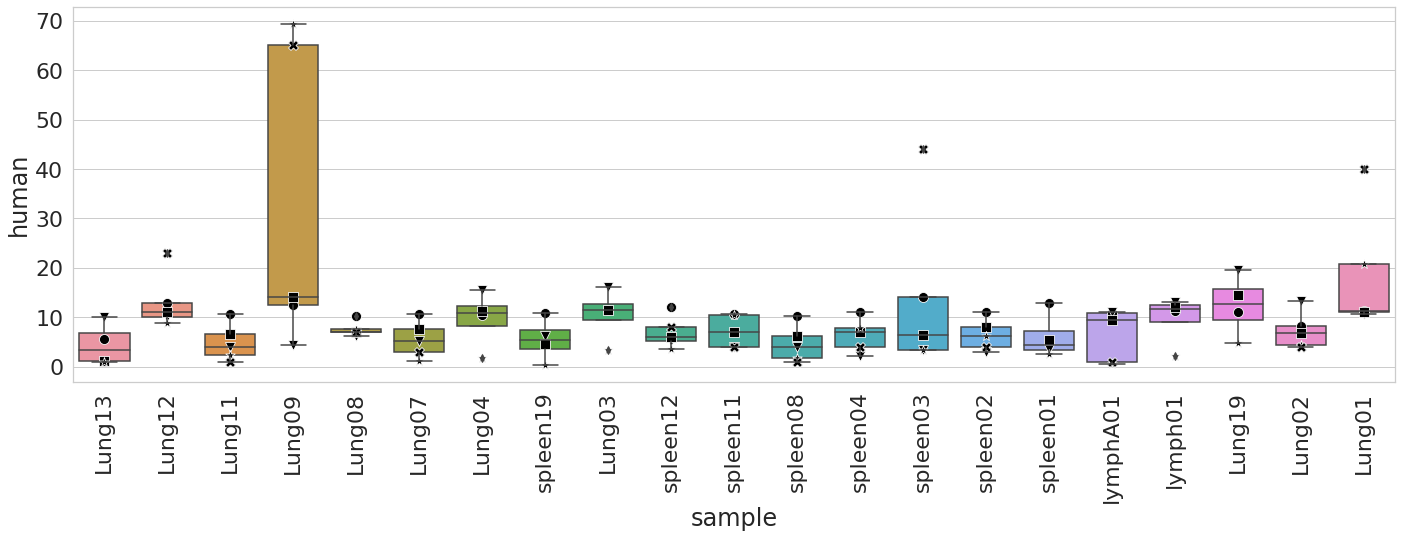

In [289]:
sns.set(rc={"figure.figsize":(20, 8)}) #width, #height
sns.set(font_scale=2)
sns.set_style("whitegrid")
ax=sns.boxplot(x = 'sample', y = 'human', data = df_concat)
#sns.stripplot(x = 'sample', y = 'human', data = df_concat, color='black', size=5, jitter=0.1)
sa_vs=df_concat[df_concat["type"] == 'sa_vs']
sns.scatterplot(data=sa_vs, x="sample", y="human", s=100, color="black", marker="o")
disamb=df_concat[df_concat["type"] == 'disamb']
sns.scatterplot(data=disamb, x="sample", y="human", s=100, color="black", marker="v")
sa_l0=df_concat[df_concat["type"] == 'sa_l0']
sns.scatterplot(data=sa_l0, x="sample", y="human", s=100, color="black", marker="s")
seal_toss=df_concat[df_concat["type"] == 'seal_toss']
sns.scatterplot(data=seal_toss, x="sample", y="human", s=100, color="black", marker="*")
STAT=df_concat[df_concat["type"] == 'STAT']
sns.scatterplot(data=STAT, x="sample", y="human", s=100, color="black", marker="X")
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig(BASE_PATH+'/general_plots/PRJNA573298_SRA_human_reads_all_methods_seaborn.png', bbox_inches='tight')

In [201]:
#### contigs

In [202]:
df18=pd.read_csv(BASE_PATH+'/general_plots/SerialAlign_bowtie2_MEGAHITfinal__4_genomes_smL0_0_stacked_df.csv')
df18.columns=['SRA', 'human_mega_sa_l0','mouse_mega_sa_l0','manjav_mega_sa_l0','manpten_mega_sa_l0']  
df18.set_index('SRA', inplace=True)
df18.head()

,human_mega_sa_l0,mouse_mega_sa_l0,manjav_mega_sa_l0,manpten_mega_sa_l0
SRA,,,,
SRR10168373,40.000000,0.00000,60.000000,0.000000
SRR10168374,12.195122,0.00000,85.365854,2.439024
SRR10168375,47.435897,0.00000,52.564103,0.000000
SRR10168376,98.391167,0.00000,1.608833,0.000000
SRR10168377,11.271676,4.33526,83.815029,0.578035


In [203]:
df19=pd.read_csv(BASE_PATH+'/general_plots/SerialAlign_bowtie2_MEGAHITfinal__4_genomes_very-sensitive_stacked_df.csv')
df19.columns=['SRA', 'human_mega_sa_vs','mouse_mega_sa_vs','manjav_mega_sa_vs','manpten_mega_sa_vs']  
df19.set_index('SRA', inplace=True)
df19.head()

,human_mega_sa_vs,mouse_mega_sa_vs,manjav_mega_sa_vs,manpten_mega_sa_vs
SRA,,,,
SRR10168373,91.263620,1.759636,6.976744,0.000000
SRR10168374,72.665307,2.334693,24.305556,0.694444
SRR10168375,74.571535,1.110553,24.317912,0.000000
SRR10168376,98.983707,0.090199,0.926094,0.000000
SRR10168377,41.290262,14.600976,43.806647,0.302115


In [205]:
df20=pd.read_csv(BASE_PATH+'/general_plots/MEGAHIT_final_hu_mus_manjav_manpten_default_bowtie2_ConcatRef_split_all4_flagstats_basic_stats_df.csv')
df20.columns=['SRA', 'manpten_mega_cr','manjav_mega_cr','human_mega_cr','mouse_mega_cr']  
df20.set_index('SRA', inplace=True)
df20.head()

,manpten_mega_cr,manjav_mega_cr,human_mega_cr,mouse_mega_cr
SRA,,,,
SRR10168373,2.515723,44.025157,52.201258,1.257862
SRR10168374,5.986696,68.292683,25.055432,0.665188
SRR10168375,3.750647,78.763580,17.304708,0.181066
SRR10168376,0.354667,7.077221,92.487506,0.080606
SRR10168377,5.075758,79.128788,11.780303,4.015152


In [206]:
df21=pd.read_csv(BASE_PATH+'/general_plots/PRJNA573298_SRA_pangolin_human_mouse_blast_contigs_02052022_df.csv')
df21.columns=['SRA', 'human_mega_blast','mouse_mega_blast','pangolin_mega_blast']  
df21.set_index('SRA', inplace=True)
df21.head()

,human_mega_blast,mouse_mega_blast,pangolin_mega_blast
SRA,,,
SRR10168373,61.111111,0.000000,33.333333
SRR10168374,20.629371,0.000000,76.573427
SRR10168375,37.430168,0.000000,61.103352
SRR10168376,94.600468,0.016717,4.680709
SRR10168377,17.032485,3.160667,77.699737


In [207]:
df_disambig_contigs=pd.read_csv(BASE_PATH+'/general_plots/disambiguated_MEGAHITfinal_human_mouse_manjav_bwamem_stats_df.csv')
df_disambig_contigs.columns=['SRA', 'human_mega_disamb','mouse_mega_disamb','manjav_mega_disamb','manjav_ambig_mega_disamb']  
df_disambig_contigs.set_index('SRA', inplace=True)
df_disambig_contigs.head()

,human_mega_disamb,mouse_mega_disamb,manjav_mega_disamb,manjav_ambig_mega_disamb
SRA,,,,
SRR10168373,1.211817,0.115723,97.050154,1.622306
SRR10168374,7.263923,0.774818,91.364003,0.597256
SRR10168375,2.149730,0.286499,97.113276,0.450495
SRR10168376,46.552505,0.226313,52.293301,0.927882
SRR10168377,9.925805,2.252986,87.237604,0.583605


In [208]:
df_contigs = pd.concat([df18, df19, df20, df21, df_disambig_contigs], axis=1)
df_contigs.head()

,human_mega_sa_l0,mouse_mega_sa_l0,manjav_mega_sa_l0,manpten_mega_sa_l0,human_mega_sa_vs,mouse_mega_sa_vs,manjav_mega_sa_vs,manpten_mega_sa_vs,manpten_mega_cr,manjav_mega_cr,human_mega_cr,mouse_mega_cr,human_mega_blast,mouse_mega_blast,pangolin_mega_blast,human_mega_disamb,mouse_mega_disamb,manjav_mega_disamb,manjav_ambig_mega_disamb
SRA,,,,,,,,,,,,,,,,,,,
SRR10168373,40.000000,0.00000,60.000000,0.000000,91.263620,1.759636,6.976744,0.000000,2.515723,44.025157,52.201258,1.257862,61.111111,0.000000,33.333333,1.211817,0.115723,97.050154,1.622306
SRR10168374,12.195122,0.00000,85.365854,2.439024,72.665307,2.334693,24.305556,0.694444,5.986696,68.292683,25.055432,0.665188,20.629371,0.000000,76.573427,7.263923,0.774818,91.364003,0.597256
SRR10168375,47.435897,0.00000,52.564103,0.000000,74.571535,1.110553,24.317912,0.000000,3.750647,78.763580,17.304708,0.181066,37.430168,0.000000,61.103352,2.149730,0.286499,97.113276,0.450495
SRR10168376,98.391167,0.00000,1.608833,0.000000,98.983707,0.090199,0.926094,0.000000,0.354667,7.077221,92.487506,0.080606,94.600468,0.016717,4.680709,46.552505,0.226313,52.293301,0.927882
SRR10168377,11.271676,4.33526,83.815029,0.578035,41.290262,14.600976,43.806647,0.302115,5.075758,79.128788,11.780303,4.015152,17.032485,3.160667,77.699737,9.925805,2.252986,87.237604,0.583605


In [273]:
df_contigs['sample']=df_sra_codes['sample'].tolist()

In [278]:
def pivot_row(sra, df, sample, species, types):
    f=df_contigs[df_contigs.columns[pd.Series(df_contigs.columns).str.startswith(species)]]
    row=f.loc[[sra]]
    col=row.melt().drop('variable',axis=1).rename({'value':species},axis=1)
    col['SRA']=sra
    col['type']=types
    col['sample']=sample
    return col

In [279]:
frames=[]
for sra, sample in zip(df_contigs.index.values.tolist(), df_contigs['sample'].tolist()):
    df_col=pivot_row(sra, df_contigs, sample, species='human', types=['sa_l0','sa_vs','cr', 'blast', 'disamb'])
    frames.append(df_col)
df_concat = pd.concat(frames, axis=0)

In [280]:
df_concat.head(n=10)

,human,SRA,type,sample
0,40.000000,SRR10168373,sa_l0,Lung13
1,91.263620,SRR10168373,sa_vs,Lung13
2,52.201258,SRR10168373,cr,Lung13
3,61.111111,SRR10168373,blast,Lung13
4,1.211817,SRR10168373,disamb,Lung13
0,12.195122,SRR10168374,sa_l0,Lung12
1,72.665307,SRR10168374,sa_vs,Lung12
2,25.055432,SRR10168374,cr,Lung12
3,20.629371,SRR10168374,blast,Lung12
4,7.263923,SRR10168374,disamb,Lung12


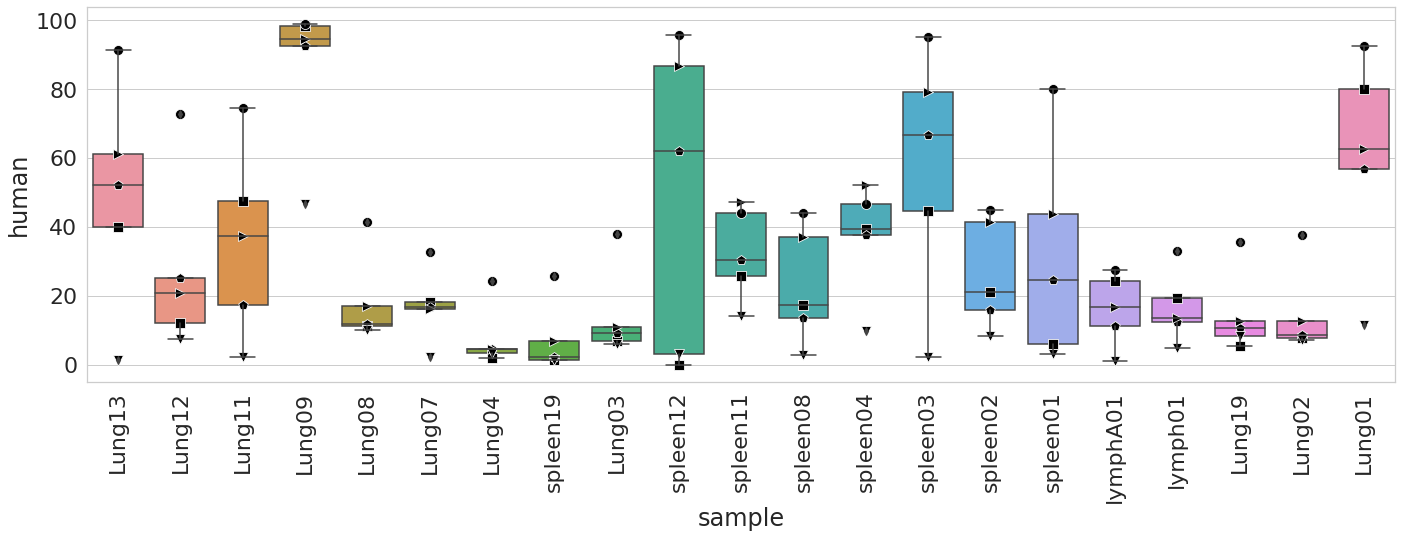

In [285]:
sns.set(rc={"figure.figsize":(20, 8)}) #width, #height
sns.set(font_scale=2)
sns.set_style("whitegrid")
ax=sns.boxplot(x = 'sample', y = 'human', data = df_concat)
#types=['sa_l0','sa_vs','cr', 'blast', 'disamb']
sa_l0=df_concat[df_concat["type"] == 'sa_l0']
sns.scatterplot(data=sa_l0, x="sample", y="human", s=100, color="black", marker="s")
sa_vs=df_concat[df_concat["type"] == 'sa_vs']
sns.scatterplot(data=sa_vs, x="sample", y="human", s=100, color="black", marker="o")
cr=df_concat[df_concat["type"] == 'cr']
sns.scatterplot(data=cr, x="sample", y="human", s=100, color="black", marker="p")
blast=df_concat[df_concat["type"] == 'blast']
sns.scatterplot(data=blast, x="sample", y="human", s=100, color="black", marker=">")
disamb=df_concat[df_concat["type"] == 'disamb']
sns.scatterplot(data=disamb, x="sample", y="human", s=100, color="black", marker="v")
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig(BASE_PATH+'/general_plots/PRJNA573298_SRA_human_contigs_all_methods_seaborn.png', bbox_inches='tight')

In [6]:
df_mt=pd.read_csv(BASE_PATH+'/general_plots/PRJNA786627_Liu_hu_Mt.csv')
df_mt.columns=['SRA', 'Sample','Human_Mt']  
df_mt.head()

,SRA,Sample,Human_Mt
0,SRR10168373,Lung13,0.006706
1,SRR10168374,Lung12,1.268742
2,SRR10168375,Lung11,0.003069
3,SRR10168376,Lung09,0.356263
4,SRR10168377,Lung08,14.438789


In [13]:
sns.set()
sns.set_style("whitegrid")

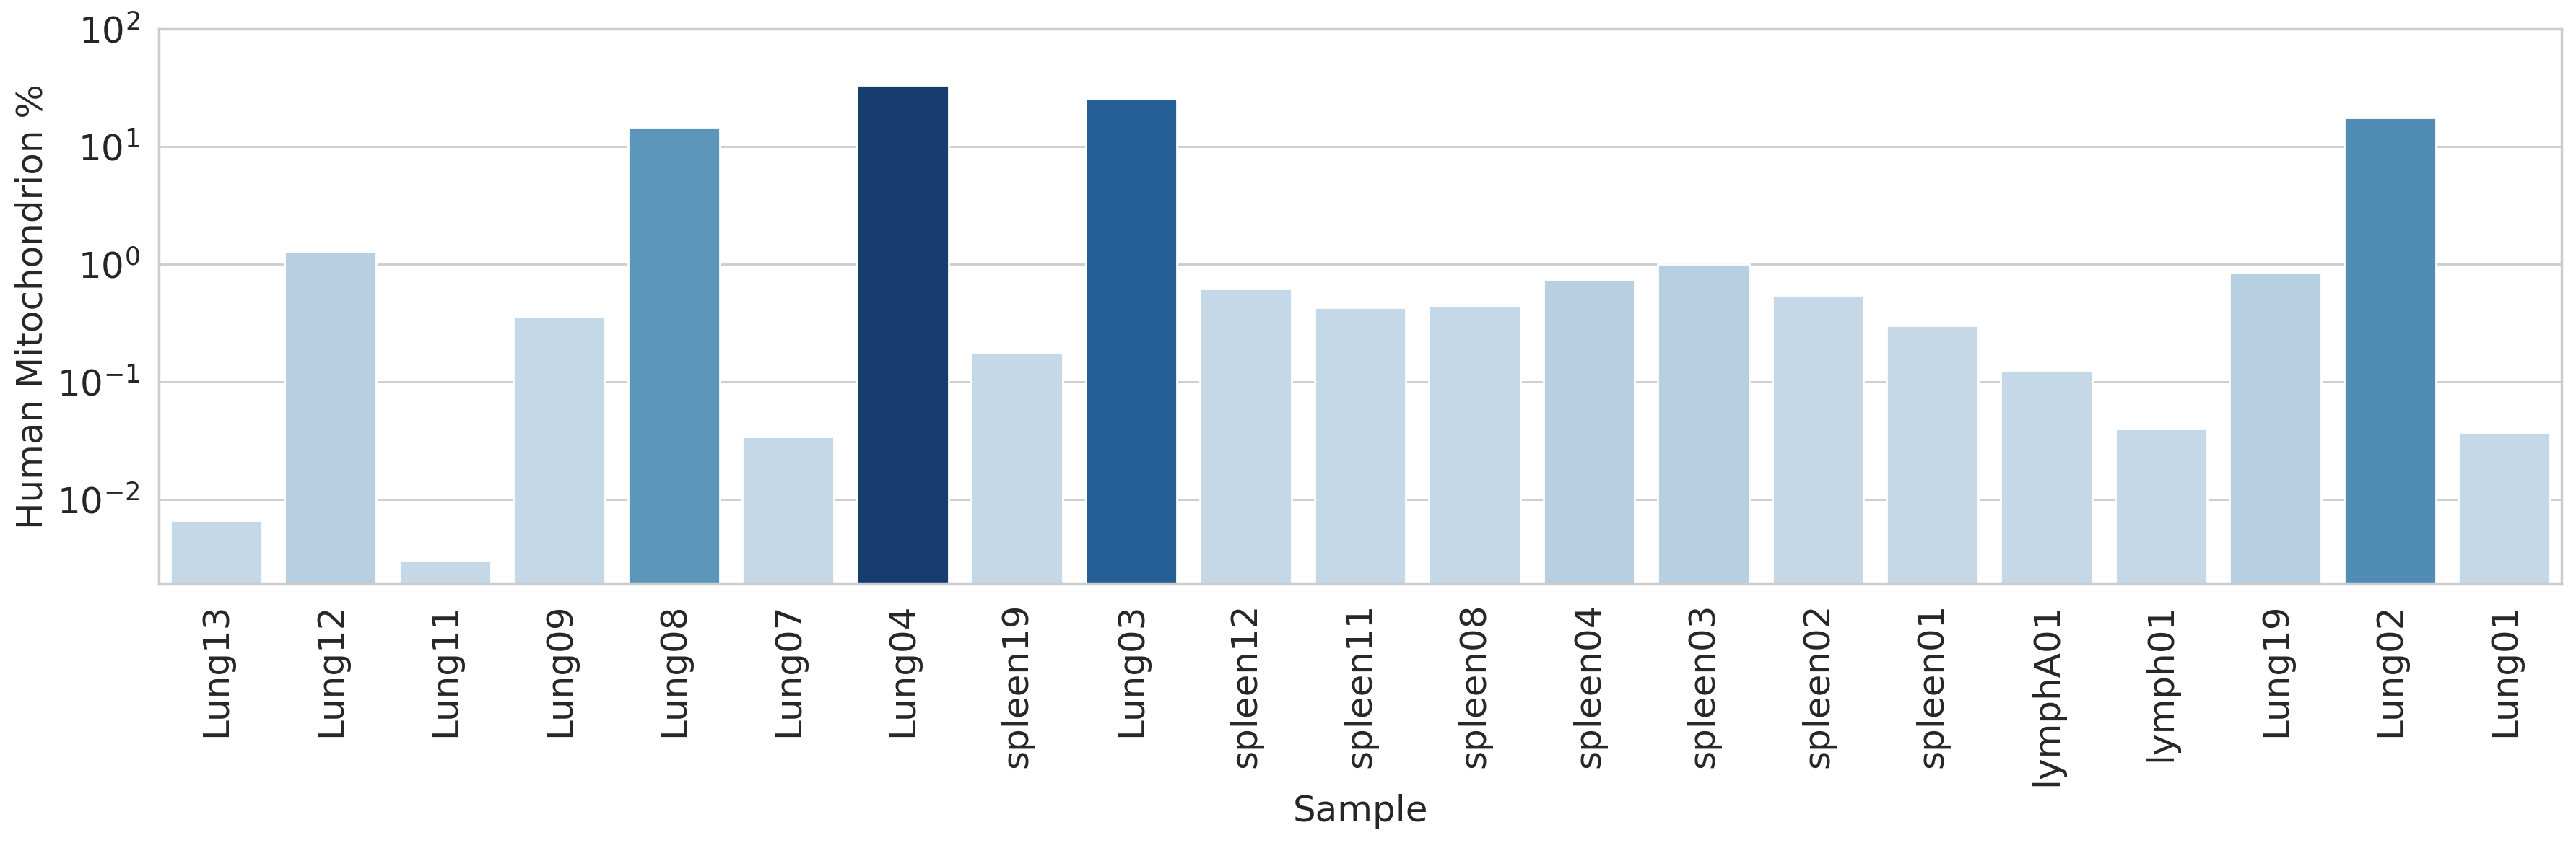

In [16]:
fig, ax = plt.subplots(figsize=(18,6), dpi= 200)

y_vals=df_mt['Human_Mt'].tolist()
rank = [int((max(y_vals)-elem)*len(y_vals)*0.75/(max(y_vals)+1)) for elem in y_vals] 
pal = sns.color_palette("Blues",len(y_vals))

sns.barplot(x="Sample", y="Human_Mt", data=df_mt, palette=np.array(pal[::-1])[rank])
ax.set(yscale="log")
ax.set(ylim=(0, 100))
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=90)
plt.xlabel('Sample', fontsize=18);
plt.ylabel('Human Mitochondrion %', fontsize=18);
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tight_layout()
plt.savefig(BASE_PATH+'/general_plots/PRJNA573298_SRA_human_Mt_seaborn.png', bbox_inches='tight')